In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=hr---------hr-tso-0001entryproduction,hr---------hr-tso-0001exitstorage,hr---------hr-tso-0001entrylng%20terminals,hr---------hr-tso-0001entrystorage,hr---------hr-tso-0001entrytransmissionsi---------,hr---------hr-tso-0001entrytransmissionhu---------,hr---------hr-tso-0001exittransmissionhu---------,hr---------hr-tso-0001exittransmissionsi---------,hr---------hr-tso-0001exitfinal%20consumers&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesHRHR---------HR-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesHRHR---------HR-TSO-0001entryProduc...        1   Aggregates   
2    1AggregatesHRHR---------HR-TSO-0001entryStorag...        1   Aggregates   
3    1AggregatesHRHR---------HR-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesHRHR---------HR-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
274  1AggregatesHRHR---------HR-TSO-0001entryTransm...        1   Aggregates   
275  1AggregatesHRHR---------HR-TSO-0001exitFinal C...        1   Aggregates   
276  1AggregatesHRHR---------HR-TSO-0001exitStorage...        1   Aggregates   
277  1AggregatesHRHR---------HR-TSO-0001exitTransmi...        1   Aggregates   
278  1AggregatesHRHR---------HR-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day     value
0          entry    2  61329679
1          entry    2  16834476
2          entry    2  23961745
3          entry    2   5657976
4          entry    2   6176637
..           ...  ...       ...
274        entry    1   7684701
275         exit    1  96075116
276         exit    1   6493301
277         exit    1         0
278         exit    1         0

[279 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                        value
day directionKey             
1   entry         11993109.20
    exit          25642104.25
2   entry         22792102.60
    exit          40224671.00
3   entry         23969073.80
...                       ...
29  exit          23712858.25
30  entry         14875431.20
    exit          24082146.75
31  entry         15596375.20
    exit          24762436.25

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

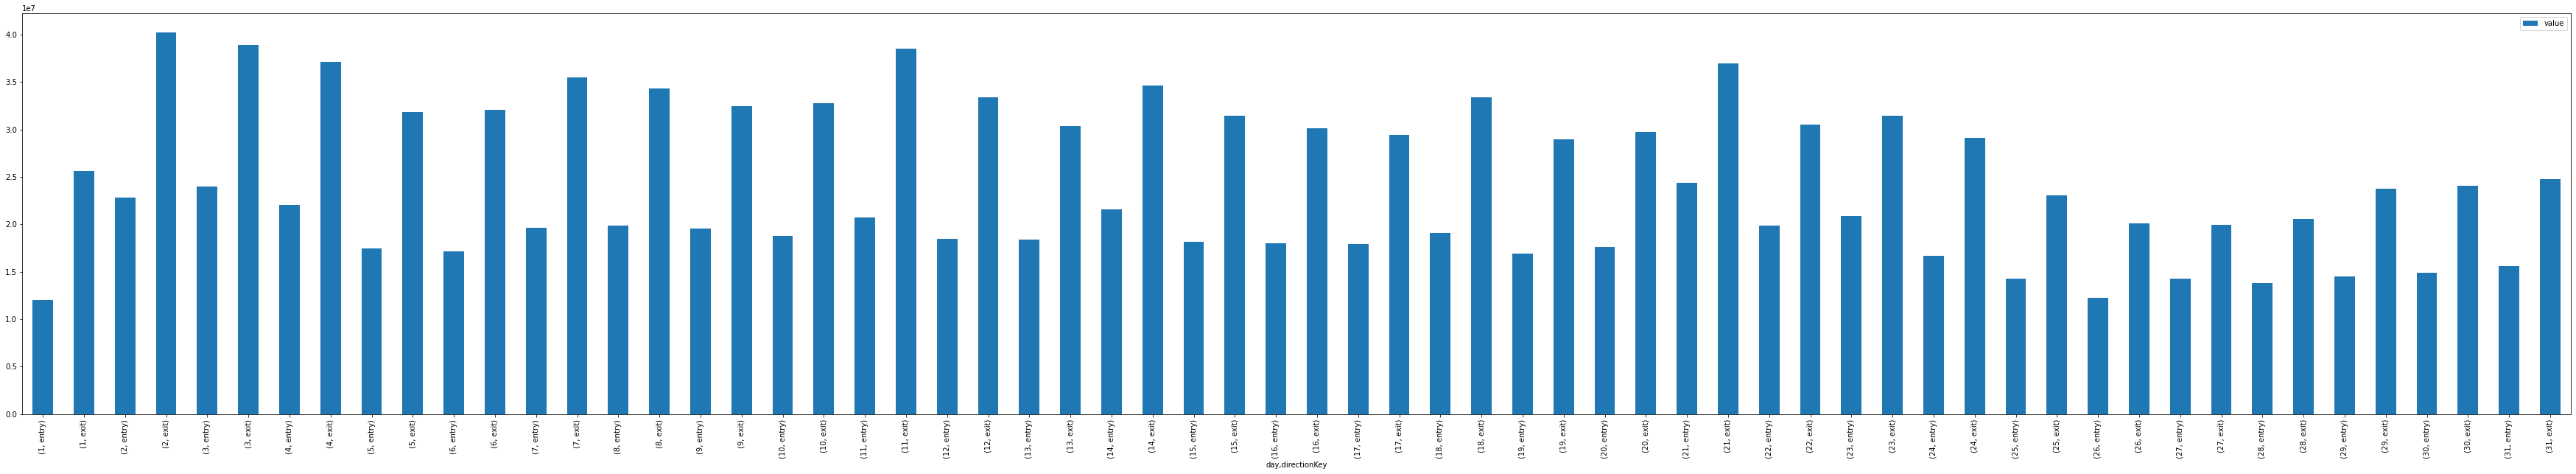

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))